<a href="https://colab.research.google.com/github/Liliya9307/Data_analysis_crimeLA/blob/main/DataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#This install is to get a package needed to load the csv file into the notebook
!pip install gdown

In [2]:
#Imports, we can add as needed or add more later
import pandas as pd
import gdown
import matplotlib.pyplot as plt
import numpy as np
import folium
from folium.plugins import HeatMap
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

You can add text and use markdown in cells like this one.

In [3]:
#File download, this might need to be run each time, not sure yet.
file_id = '1blMGc_piXERd0nHAdAIE3NJhjX2t_u0T'
gdown.download(f"https://drive.google.com/uc?id={file_id}", 'data.csv', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1blMGc_piXERd0nHAdAIE3NJhjX2t_u0T
From (redirected): https://drive.google.com/uc?id=1blMGc_piXERd0nHAdAIE3NJhjX2t_u0T&confirm=t&uuid=cca43597-c5cd-4bce-8fda-c1ce3a2c28ce
To: /content/data.csv
100%|██████████| 194M/194M [00:02<00:00, 69.7MB/s]


'data.csv'

In [4]:
#Here's the dataframe creation in pandas
df = pd.read_csv("data.csv")
df.head()

DR_NO           Date_Reported            Date_occured  Time_occured  \
0  190326475           03/01/20 0:00           03/01/20 0:00          2130   
1  200106753           02/09/20 0:00           02/08/20 0:00          1800   
2  200320258           11/11/20 0:00           11/04/20 0:00          1700   
3  200907217           05/10/23 0:00           03/10/20 0:00          2037   
4  220614831  08/18/2022 12:00:00 AM  08/17/2020 12:00:00 AM          1200   

        Area                                Crime_Code  Victim_age Victim_sex  \
0   Wilshire                          VEHICLE - STOLEN           0          M   
1    Central                     BURGLARY FROM VEHICLE          47          M   
2  Southwest                             BIKE - STOLEN          19          X   
3   Van Nuys  SHOPLIFTING-GRAND THEFT ($950.01 & OVER)          19          M   
4  Hollywood                         THEFT OF IDENTITY          28          M   

  Victim_descent                                        Premis Weapon  \
0              O                                        STREET    NaN   
1              O             BUS STOP/LAYOVER (ALSO QUERY 124)    NaN   
2              X  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)    NaN   
3              O                                CLOTHING STORE    NaN   
4              H                                      SIDEWALK    NaN   

         Status                                  LOCATION      LAT       LON  
0  Adult Arrest   1900 S  LONGWOOD                     AV  34.0375 -118.3506  
1   Invest Cont   1000 S  FLOWER                       ST  34.0444 -118.2628  
2   Invest Cont   1400 W  37TH                         ST  34.0210 -118.3002  
3   Invest Cont  14000    RIVERSIDE                    DR  34.1576 -118.4387  
4   Invest Cont                         1900    TRANSIENT  34.0944 -118.3277

In [5]:
#a bit of cleaning
df['Time_occured'] = df['Time_occured'].astype(str).str.zfill(4)  # Convert to string and pad with zeros
if not pd.api.types.is_datetime64_any_dtype(df['Date_occured']): #make sure date is formatted as date
    df['Date_occured'] = pd.to_datetime(df['Date_occured'])
#This takes the date and time occurred column and creates a new column that combines them
df['Datetime_occured'] = pd.to_datetime(df['Date_occured'].dt.strftime('%Y-%m-%d') + ' ' + df['Time_occured'].str[:2] + ':' + df['Time_occured'].str[2:], format='%Y-%m-%d %H:%M')
#Drop the unused data
df = df.drop(['Date_occured', 'Time_occured', 'Date_Reported'], axis=1)
df.head()

<ipython-input-5-b276dec9fce6>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date_occured'] = pd.to_datetime(df['Date_occured'])


DR_NO       Area                                Crime_Code  Victim_age  \
0  190326475   Wilshire                          VEHICLE - STOLEN           0   
1  200106753    Central                     BURGLARY FROM VEHICLE          47   
2  200320258  Southwest                             BIKE - STOLEN          19   
3  200907217   Van Nuys  SHOPLIFTING-GRAND THEFT ($950.01 & OVER)          19   
4  220614831  Hollywood                         THEFT OF IDENTITY          28   

  Victim_sex Victim_descent                                        Premis  \
0          M              O                                        STREET   
1          M              O             BUS STOP/LAYOVER (ALSO QUERY 124)   
2          X              X  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)   
3          M              O                                CLOTHING STORE   
4          M              H                                      SIDEWALK   

  Weapon        Status                                  LOCATION      LAT  \
0    NaN  Adult Arrest   1900 S  LONGWOOD                     AV  34.0375   
1    NaN   Invest Cont   1000 S  FLOWER                       ST  34.0444   
2    NaN   Invest Cont   1400 W  37TH                         ST  34.0210   
3    NaN   Invest Cont  14000    RIVERSIDE                    DR  34.1576   
4    NaN   Invest Cont                         1900    TRANSIENT  34.0944   

        LON    Datetime_occured  
0 -118.3506 2020-03-01 21:30:00  
1 -118.2628 2020-02-08 18:00:00  
2 -118.3002 2020-11-04 17:00:00  
3 -118.4387 2020-03-10 20:37:00  
4 -118.3277 2020-08-17 12:00:00

In [6]:
# Check for missing values and data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974477 entries, 0 to 974476
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DR_NO             974477 non-null  int64         
 1   Area              974477 non-null  object        
 2   Crime_Code        974477 non-null  object        
 3   Victim_age        974477 non-null  int64         
 4   Victim_sex        838474 non-null  object        
 5   Victim_descent    838464 non-null  object        
 6   Premis            973893 non-null  object        
 7   Weapon            325782 non-null  object        
 8   Status            974477 non-null  object        
 9   LOCATION          974477 non-null  object        
 10  LAT               974477 non-null  float64       
 11  LON               974477 non-null  float64       
 12  Datetime_occured  974477 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memor

In [7]:
# Get a statistical summary
print(df.describe())

              DR_NO     Victim_age            LAT            LON  \
count  9.744770e+05  974477.000000  974477.000000  974477.000000   
mean   2.195654e+08      29.168748      33.995066    -118.079971   
min    8.170000e+02      -4.000000       0.000000    -118.667600   
25%    2.106058e+08       0.000000      34.014600    -118.430600   
50%    2.208087e+08      30.000000      34.058900    -118.322500   
75%    2.309064e+08      44.000000      34.164900    -118.273900   
max    2.499253e+08     120.000000      34.334300       0.000000   
std    1.285558e+07      21.954094       1.643523       5.696584   

                    Datetime_occured  
count                         974477  
mean   2022-04-17 00:04:13.692576256  
min              2020-01-01 00:01:00  
25%              2021-03-23 12:50:00  
50%              2022-05-02 20:00:00  
75%              2023-05-16 17:00:00  
max              2024-09-02 22:00:00  
std                              NaN  


In [8]:
# Check for missing values
print(df.isnull().sum())

DR_NO                    0
Area                     0
Crime_Code               0
Victim_age               0
Victim_sex          136003
Victim_descent      136013
Premis                 584
Weapon              648695
Status                   0
LOCATION                 0
LAT                      0
LON                      0
Datetime_occured         0
dtype: int64


In [9]:
# Fill missing values in 'Victim_sex' and 'Victim_descent' with 'Unknown'
# I don't see it was filled with unknown, not sure
df.fillna({'Victim_sex': 'Unknown', 'Victim_descent': 'Unknown'}, inplace=True)


In [10]:
df.describe()

DR_NO     Victim_age            LAT            LON  \
count  9.744770e+05  974477.000000  974477.000000  974477.000000   
mean   2.195654e+08      29.168748      33.995066    -118.079971   
min    8.170000e+02      -4.000000       0.000000    -118.667600   
25%    2.106058e+08       0.000000      34.014600    -118.430600   
50%    2.208087e+08      30.000000      34.058900    -118.322500   
75%    2.309064e+08      44.000000      34.164900    -118.273900   
max    2.499253e+08     120.000000      34.334300       0.000000   
std    1.285558e+07      21.954094       1.643523       5.696584   

                    Datetime_occured  
count                         974477  
mean   2022-04-17 00:04:13.692576256  
min              2020-01-01 00:01:00  
25%              2021-03-23 12:50:00  
50%              2022-05-02 20:00:00  
75%              2023-05-16 17:00:00  
max              2024-09-02 22:00:00  
std                              NaN

In [11]:
# Check for missing values again

print(df.isnull().sum())

DR_NO                    0
Area                     0
Crime_Code               0
Victim_age               0
Victim_sex               0
Victim_descent           0
Premis                 584
Weapon              648695
Status                   0
LOCATION                 0
LAT                      0
LON                      0
Datetime_occured         0
dtype: int64


In [12]:
# Selecting the required columns
df_filtered = df[['Datetime_occured', 'Victim_sex','Area', 'Crime_Code', 'Victim_age', 'LOCATION', 'LAT', 'LON']]

# Display the filtered DataFrame
print(df_filtered.head(5))

     Datetime_occured Victim_sex       Area  \
0 2020-03-01 21:30:00          M   Wilshire   
1 2020-02-08 18:00:00          M    Central   
2 2020-11-04 17:00:00          X  Southwest   
3 2020-03-10 20:37:00          M   Van Nuys   
4 2020-08-17 12:00:00          M  Hollywood   

                                 Crime_Code  Victim_age  \
0                          VEHICLE - STOLEN           0   
1                     BURGLARY FROM VEHICLE          47   
2                             BIKE - STOLEN          19   
3  SHOPLIFTING-GRAND THEFT ($950.01 & OVER)          19   
4                         THEFT OF IDENTITY          28   

                                   LOCATION      LAT       LON  
0   1900 S  LONGWOOD                     AV  34.0375 -118.3506  
1   1000 S  FLOWER                       ST  34.0444 -118.2628  
2   1400 W  37TH                         ST  34.0210 -118.3002  
3  14000    RIVERSIDE                    DR  34.1576 -118.4387  
4                         1900    TRA

In [13]:
# Frequency of different crime types
crime_type_count = df_filtered['Crime_Code'].value_counts()
print(crime_type_count.head(10))  # Show top 10 crime types


Crime_Code
VEHICLE - STOLEN                                           109088
BATTERY - SIMPLE ASSAULT                                    74649
BURGLARY FROM VEHICLE                                       60693
THEFT OF IDENTITY                                           60290
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     59116
BURGLARY                                                    57701
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              53347
THEFT PLAIN - PETTY ($950 & UNDER)                          50686
INTIMATE PARTNER - SIMPLE ASSAULT                           46689
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)             38948
Name: count, dtype: int64


In [14]:
print(df_filtered.columns)


Index(['Datetime_occured', 'Victim_sex', 'Area', 'Crime_Code', 'Victim_age',
       'LOCATION', 'LAT', 'LON'],
      dtype='object')


In [15]:
df_filtered.describe()

Datetime_occured     Victim_age            LAT  \
count                         974477  974477.000000  974477.000000   
mean   2022-04-17 00:04:13.692576256      29.168748      33.995066   
min              2020-01-01 00:01:00      -4.000000       0.000000   
25%              2021-03-23 12:50:00       0.000000      34.014600   
50%              2022-05-02 20:00:00      30.000000      34.058900   
75%              2023-05-16 17:00:00      44.000000      34.164900   
max              2024-09-02 22:00:00     120.000000      34.334300   
std                              NaN      21.954094       1.643523   

                 LON  
count  974477.000000  
mean     -118.079971  
min      -118.667600  
25%      -118.430600  
50%      -118.322500  
75%      -118.273900  
max         0.000000  
std         5.696584

In [16]:
print(df_filtered.isnull().sum())

Datetime_occured    0
Victim_sex          0
Area                0
Crime_Code          0
Victim_age          0
LOCATION            0
LAT                 0
LON                 0
dtype: int64


In [17]:
# Create a new column with null values (NaN)
df_filtered.loc[:, "time_interval"] = None

<ipython-input-17-01b4947f17a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, "time_interval"] = None


In [18]:
# Convert 'Datetime_occured' to datetime format
df_filtered["Datetime_occured"] = pd.to_datetime(df_filtered["Datetime_occured"])

# Sort the DataFrame by 'Datetime_occured' in ascending order
df_filtered = df_filtered.sort_values(by="Datetime_occured")

# Reset the index if desired
df_filtered = df_filtered.reset_index(drop=True)


<ipython-input-18-377eae86a3cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Datetime_occured"] = pd.to_datetime(df_filtered["Datetime_occured"])


In [19]:
# Calculate time intervals in minutes between consecutive rows
df_filtered["time_interval"] = df_filtered["Datetime_occured"].diff().dt.total_seconds() / 60

In [20]:
df_filtered.head(100)

Datetime_occured Victim_sex         Area  \
0  2020-01-01 00:01:00          F      Rampart   
1  2020-01-01 00:01:00          M    Southeast   
2  2020-01-01 00:01:00          F    Southeast   
3  2020-01-01 00:01:00          X    Northeast   
4  2020-01-01 00:01:00          M    Southeast   
..                 ...        ...          ...   
95 2020-01-01 00:01:00          M   Devonshire   
96 2020-01-01 00:01:00          M       Harbor   
97 2020-01-01 00:01:00          M       Newton   
98 2020-01-01 00:01:00          F  West Valley   
99 2020-01-01 00:01:00          F    Hollywood   

                                           Crime_Code  Victim_age  \
0   CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...          12   
1            VANDALISM - MISDEAMEANOR ($399 OR UNDER)          21   
2                                      RAPE, FORCIBLE          12   
3                      DISCHARGE FIREARMS/SHOTS FIRED           0   
4            VANDALISM - MISDEAMEANOR ($399 OR UNDER)          20   
..                                                ...         ...   
95    THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)          33   
96            CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT          11   
97         EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)           0   
98             CRIMINAL THREATS - NO WEAPON DISPLAYED          56   
99  SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W...          14   

                                    LOCATION      LAT       LON  time_interval  
0    1600 W  2ND                          ST  34.0627 -118.2652            NaN  
1     800 W  112TH                        ST  33.9334 -118.2885            0.0  
2    1500 E  IMPERIAL                     HY  33.9295 -118.2482            0.0  
3            BAYWOOD                      ST  34.1353 -118.2690            0.0  
4     800 W  112TH                        ST  33.9334 -118.2885            0.0  
..                                       ...      ...       ...            ...  
95           LOUISE                       AV  34.2709 -118.5109            0.0  
96   1500    252ND                        ST  33.7957 -118.3027            0.0  
97    600 E  WASHINGTON                   BL  34.0282 -118.2587            0.0  
98  18300    COLLINS                      ST  34.1749 -118.5308            0.0  
99   1000 N  WILTON                       PL  34.0885 -118.3136            0.0  

[100 rows x 9 columns]

In [21]:
# format datetime
df_filtered['Datetime_occured'] = pd.to_datetime(df_filtered['Datetime_occured'])

df_filtered['Year'] = df_filtered['Datetime_occured'].dt.year
unique_years = df_filtered['Year'].unique()

# DataFrame
for year in unique_years:
    globals()[f"df_filtered_{year}"] = df_filtered[df_filtered['Year'] == year]

df_filtered_2020.head()

Datetime_occured Victim_sex       Area  \
0 2020-01-01 00:01:00          F    Rampart   
1 2020-01-01 00:01:00          M  Southeast   
2 2020-01-01 00:01:00          F  Southeast   
3 2020-01-01 00:01:00          X  Northeast   
4 2020-01-01 00:01:00          M  Southeast   

                                          Crime_Code  Victim_age  \
0  CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...          12   
1           VANDALISM - MISDEAMEANOR ($399 OR UNDER)          21   
2                                     RAPE, FORCIBLE          12   
3                     DISCHARGE FIREARMS/SHOTS FIRED           0   
4           VANDALISM - MISDEAMEANOR ($399 OR UNDER)          20   

                                  LOCATION      LAT       LON  time_interval  \
0  1600 W  2ND                          ST  34.0627 -118.2652            NaN   
1   800 W  112TH                        ST  33.9334 -118.2885            0.0   
2  1500 E  IMPERIAL                     HY  33.9295 -118.2482            0.0   
3          BAYWOOD                      ST  34.1353 -118.2690            0.0   
4   800 W  112TH                        ST  33.9334 -118.2885            0.0   

   Year  
0  2020  
1  2020  
2  2020  
3  2020  
4  2020

In [22]:
# Save DataFrame to CSV
df_filtered.to_csv('cleaned_data.csv', index=False)

# Download the file
from google.colab import files
files.download('cleaned_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

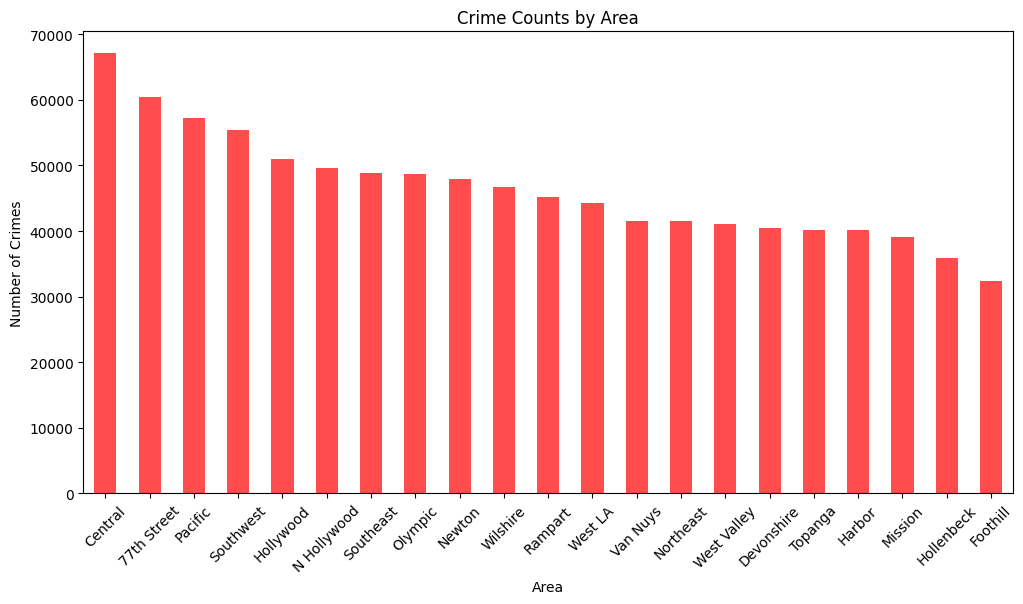

In [23]:

# Group by 'Area' and count the number of crimes
area_crime_counts = df_filtered['Area'].value_counts()

# Plot the data
area_crime_counts.plot(kind='bar', figsize=(12, 6), color='red', alpha=0.7)
plt.title("Crime Counts by Area")
plt.xlabel("Area")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)  # Rotate area labels for better readability
plt.show()


In [24]:
df['Datetime_occured'] = pd.to_datetime(df['Datetime_occured'])

df['Year'] = df['Datetime_occured'].dt.year
df['Hour'] = df['Datetime_occured'].dt.hour
df['DayOfWeek'] = df['Datetime_occured'].dt.day_name()
df['Month'] = df['Datetime_occured'].dt.month_name()

# 1. by hours
hourly_crime_counts = df.groupby('Hour').size()

# 2. by weekdays
day_of_week_crime_counts = df.groupby('DayOfWeek').size()

# 3. by month
monthly_crime_counts = df.groupby('Month').size()

# 4. by years
yearly_crime_counts = df.groupby('Year').size()

# print results
print("Crimes by Hour:\n", hourly_crime_counts)
print("\nCrimes by Day of Week:\n", day_of_week_crime_counts)
print("\nCrimes by Month:\n", monthly_crime_counts)
print("\nCrimes by Year:\n", yearly_crime_counts)


Crimes by Hour:
 Hour
0     39506
1     29003
2     24572
3     21610
4     18281
5     16839
6     22393
7     25356
8     36142
9     35418
10    41737
11    42361
12    65775
13    44171
14    47749
15    51101
16    51345
17    56936
18    58043
19    53816
20    54491
21    49259
22    47571
23    41002
dtype: int64

Crimes by Day of Week:
 DayOfWeek
Friday       148846
Monday       137449
Saturday     142893
Sunday       135496
Thursday     137466
Tuesday      133799
Wednesday    138528
dtype: int64

Crimes by Month:
 Month
April        83382
August       82616
December     73458
February     86283
January      92516
July         83669
June         81188
March        87663
May          82892
November     71744
October      76245
September    72821
dtype: int64

Crimes by Year:
 Year
2020    199769
2021    209780
2022    235116
2023    232047
2024     97765
dtype: int64


In [25]:
import folium
from folium.plugins import HeatMap

df_2023 = df_filtered[df_filtered['Datetime_occured'].dt.year == 2023]

# Drop rows with missing latitude or longitude
df_2023 = df_2023.dropna(subset=['LAT', 'LON'])

heat_data = df_2023[['LAT', 'LON']].values

# Create a map
center_lat, center_lon = df_2023['LAT'].median(), df_2023['LON'].median()
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Add HeatMap layer with green-to-red gradient
HeatMap(
    heat_data,
    radius=10,
    blur=15,
    gradient={0.1: 'rgba(0, 255, 0, 0.4)', 0.5: 'yellow', 1: 'red'}
).add_to(m)

m




In [26]:
train_size = int(len(df_2023) * 0.8)
train = df_2023[:train_size]
test = df_2023[train_size:]

print(f"Training data length: {len(train)}")
print(f"Testing data length: {len(test)}")


Training data length: 185637
Testing data length: 46410


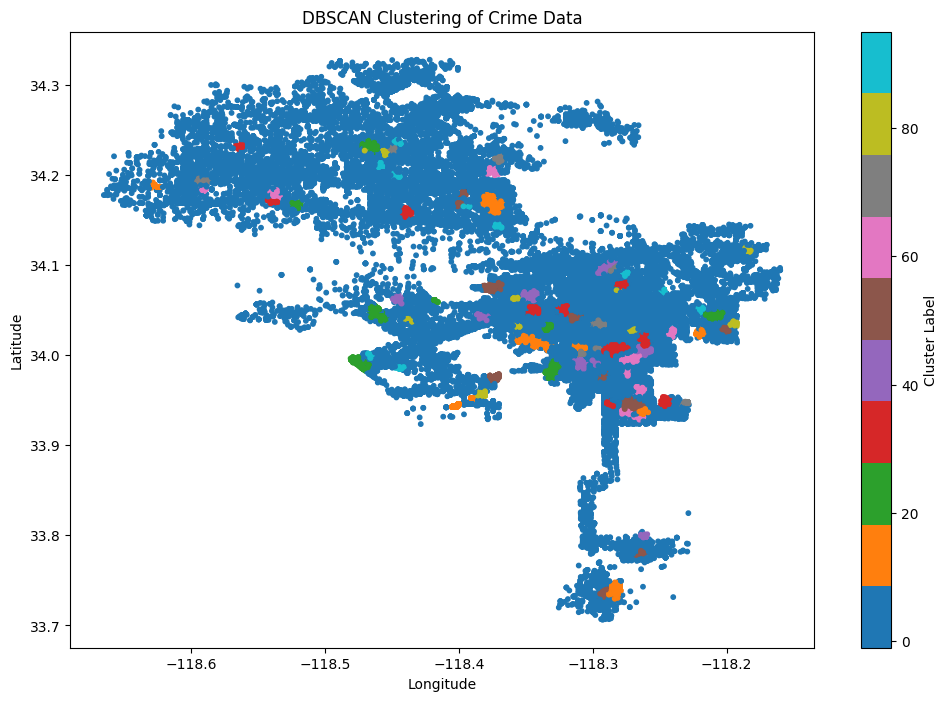

Cluster counts:
Cluster
-1     25582
 1      7511
 6      1912
 0      1111
 10      553
       ...  
 86       42
 82       30
 75       30
 83       25
 73       18
Name: count, Length: 97, dtype: int64


In [64]:
df_2023 = test[test['Datetime_occured'].dt.year == 2023]
df_2023 = df_2023[(df_2023['LAT'] != 0) | (df_2023['LON'] != 0)]
coordinates_2023 = df_2023[['LAT', 'LON']].dropna()

# Normalize the data
scaler = StandardScaler()
coordinates_scaled = scaler.fit_transform(coordinates_2023)

# Apply DBSCAN
eps = 0.03  # Distance parameter
min_samples = 50  # Minimum number of points to form a cluster
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(coordinates_scaled)

df_2023 = df_2023.merge(cluster_df, how='left', left_index=True, right_on='index')

# cluster labels to df_2023
df_2023['Cluster'] = clusters
cluster_df = pd.DataFrame({
    'index': coordinates_2023.index,
    'Cluster': clusters
})

# Visualize the results
plt.figure(figsize=(12, 8))
plt.scatter(coordinates_2023['LON'], coordinates_2023['LAT'], c=clusters, cmap='tab10', s=10)
plt.title('DBSCAN Clustering of Crime Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster Label')
plt.show()

# Display clusters
print("Cluster counts:")
print(df_2023['Cluster'].value_counts())
